[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/y-akbal/Tedu_Time_Series/blob/main/W6/W6P2.ipynb)

In [24]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [25]:
def return_random_walk(n :int, mu: float =  0.1, p0 :float = 0) -> list:
    A = []
    A.append(p0)
    for i in range(n):
      A.append(A[-1] + mu + 5*np.random.randn())
    return A

In [26]:
rw = return_random_walk(1000)

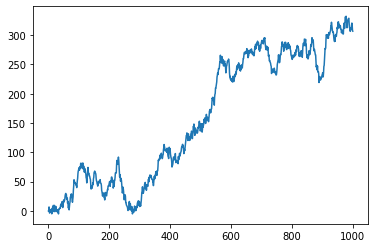

In [27]:
plt.plot(rw)

The dude above has certainly a unit root!, now lets apply ADF test to see what happens in practice, then we will jump into real life examples.

In [28]:
import statsmodels
from statsmodels.tsa import stattools

Inspect the tests [here](https://www.statsmodels.org/dev/tsa.html). Find ADF test, inspect the outputs and parameters. 

#Remember that: The null hypothesis of the Augmented Dickey-Fuller is that there is a unit root, with the alternative that there is no unit root. If the pvalue is above a critical size, then we cannot reject that there is a unit root.

In [29]:
statsmodels.tsa.stattools.adfuller(rw)

(-0.7981184606910801,
 0.8196741308644615,
 0,
 1000,
 {'1%': -3.4369061654329998, '5%': -2.86443457404, '10%': -2.568311209},
 5891.511460825429)

#Let's test a white noise:

In [30]:
statsmodels.tsa.stattools.adfuller(np.random.randn(10000))

(-98.338269756981,
 0.0,
 0,
 9999,
 {'1%': -3.4310041633725734,
  '5%': -2.861829101294412,
  '10%': -2.566923883481157},
 28142.518090305046)

We can safely reject the null hypothesis that there is no unit root!  Now let's do a real life example:

In [42]:
def download_data():  ### This dude will download the dataset from the directory directly!
  !wget https://faculty.chicagobooth.edu/-/media/faculty/ruey-s-tsay/teaching/introts/ch2data.zip
  !unzip "/content/ch2data.zip" -d "/content/ch2data/"
  if not os.getcwd() == '/content/ch2data':
    os.chdir("ch2data")
  else:
    print(f"Current directory is now {os.getcwd()}")



def to_dataframe(text: str):
    """
    
    Parameters
    ----------
    text : this dude is a text file (a string actually).

    Returns
    -------
    Pandas dataframe

    """    
    L = []
    headers = []
    with open(text) as file:
        T = file.readlines()
        for i, t in enumerate(T):
            if i == 0:
                for header  in t[:-1].split():
                  headers.append(header)      
            else:
                L.append(t[0:-1].split())
    L = pd.DataFrame(L)
    
    L = L.apply(pd.to_numeric)
    L.columns = headers
    return L
  

In [36]:
download_data()
os.listdir()   ### make sure that you are at the right directory

--2022-11-18 12:38:25--  https://faculty.chicagobooth.edu/-/media/faculty/ruey-s-tsay/teaching/introts/ch2data.zip
Resolving faculty.chicagobooth.edu (faculty.chicagobooth.edu)... 128.135.211.142
Connecting to faculty.chicagobooth.edu (faculty.chicagobooth.edu)|128.135.211.142|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 557379 (544K) [application/x-zip-compressed]
Saving to: ‘ch2data.zip.1’

ch2data.zip.1       100%[===================>] 544.32K   153KB/s    in 3.6s    

2022-11-18 12:38:28 (153 KB/s) - ‘ch2data.zip.1’ saved [557379/557379]

Archive:  /content/ch2data.zip
replace /content/ch2data/d-aapl0305.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: /content/ch2data/d-aapl0305.txt  
  inflating: /content/ch2data/d-ibm3dx7008.txt  
  inflating: /content/ch2data/d-sp55008.txt  
  inflating: /content/ch2data/d-vix0810.txt  
  inflating: /content/ch2data/m-3m4608.txt  
  inflating: /content/ch2data/m-aaa-1911.txt  
  inflating: /content/ch2data/

['d-sp55008.txt',
 'm-aaa-1911.txt',
 'q-gnp4710.txt',
 'q-GNPC96.txt',
 'd-vix0810.txt',
 'w-tb3ms.txt',
 'w-tb6ms.txt',
 'm-deciles08.txt',
 'q-gdp4708.txt',
 'w-gs1yr.txt',
 'w-gs3yr.txt',
 'm-ibm3dx2608.txt',
 'm-3m4608.txt',
 'm-ibmsp6709.txt',
 'd-aapl0305.txt',
 'm-dec125910-6111.txt',
 'm-unrate-4811.txt',
 'm-ibm3dx2609.txt',
 'm-dec12910.txt',
 'ch2data.zip',
 'q-ko-earns8309.txt',
 'ch2data.zip.1',
 'q-jnj-earns-9211.txt',
 'q-gdpc96.txt',
 'd-ibm3dx7008.txt',
 'm-baa-1911.txt']

In [43]:
data = to_dataframe('d-sp55008.txt')

In [44]:
data

,year,mon,day,open,high,low,close,volume,adjclose
0,1950,1,3,16.66,16.66,16.66,16.66,1260000,16.66
1,1950,1,4,16.85,16.85,16.85,16.85,1890000,16.85
2,1950,1,5,16.93,16.93,16.93,16.93,2550000,16.93
3,1950,1,6,16.98,16.98,16.98,16.98,2010000,16.98
4,1950,1,9,17.08,17.08,17.08,17.08,2520000,17.08
...,...,...,...,...,...,...,...,...,...
14657,2008,4,7,1373.69,1386.74,1369.02,1372.54,2147483648,1372.54
14658,2008,4,8,1370.16,1370.16,1360.62,1365.54,2147483648,1365.54
14659,2008,4,9,1365.50,1368.39,1349.97,1354.49,2147483648,1354.49
14660,2008,4,10,1355.37,1367.24,1350.11,1360.55,2147483648,1360.55


In [46]:
data_ = data["close"].apply(np.log)

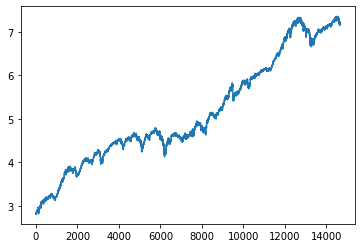

In [47]:
plt.plot(data_)   ### this dude has definitely a positive drift!

In [48]:
statsmodels.tsa.stattools.adfuller(data_, regression = "ct", maxlag = 2)

(-2.0178916252558814,
 0.5916545281598581,
 2,
 14659,
 {'1%': -3.9593877119797223,
  '5%': -3.410789544076968,
  '10%': -3.1272264013819324},
 -96554.46536832443)

#What is your conclusion for the above time series on whether it has or does not have a unit root?

In [49]:
statsmodels.tsa.stattools.adfuller(data_, regression = "ct")    ### model choses the best parameters.

(-1.9706984931544713,
 0.6173003428664666,
 34,
 14627,
 {'1%': -3.9593890636600895,
  '5%': -3.4107901994922916,
  '10%': -3.12722678734149},
 -96285.88890871292)

In [50]:
statsmodels.tsa.stattools.adfuller(data_, regression = "ct", autolag = "BIC")    ### model choses the best parameters.

(-2.0178916252558814,
 0.5916545281598581,
 2,
 14659,
 {'1%': -3.9593877119797223,
  '5%': -3.410789544076968,
  '10%': -3.1272264013819324},
 -96228.0204658315)

# ***Let's now look at how do we handle unit***

---
Let's take difference of the series!


In [51]:
diff_data = data_.diff()[1:]

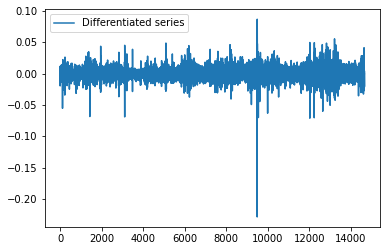

In [52]:
plt.plot(diff_data, label = "Differentiated series")
plt.legend()
plt.show()

In [53]:
statsmodels.tsa.stattools.adfuller(diff_data)    ### model choses the best parameters.

(-20.724659381334163,
 0.0,
 33,
 14627,
 {'1%': -3.4307971489693725,
  '5%': -2.861737620130706,
  '10%': -2.5668751884899237},
 -96278.89415684502)

#It is likely that this model is an AR(p, 1, q) model for some p and q to be determined.

In [54]:
from statsmodels.tsa.arima.model import ARIMA

In [59]:
model = ARIMA(diff_data, order = (2,0,0))
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  close   No. Observations:                14661
Model:                 ARIMA(2, 0, 0)   Log Likelihood               48286.876
Date:                Fri, 18 Nov 2022   AIC                         -96565.751
Time:                        12:42:03   BIC                         -96535.379
Sample:                             0   HQIC                        -96555.663
                              - 14661                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0003   8.04e-05      3.717      0.000       0.000       0.000
ar.L1          0.0721      0.004     20.125      0.000       0.065       0.079
ar.L2         -0.0387      0.004    -10.612      0.000      -0.046      -0.032
sigma2      8.068e-05   2.49e-07    323.523      0.000    8.02e-05    8.12e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):            650919.10
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               2.17   Skew:                            -1.24
Prob(H) (two-sided):                  0.00   Kurtosis:                        35.55
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [57]:
model = ARIMA(data_, order = (2,1,0))
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  close   No. Observations:                14662
Model:                 ARIMA(2, 1, 0)   Log Likelihood               48279.315
Date:                Fri, 18 Nov 2022   AIC                         -96552.630
Time:                        12:40:03   BIC                         -96529.851
Sample:                             0   HQIC                        -96545.064
                              - 14662                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0731      0.004     20.625      0.000       0.066       0.080
ar.L2         -0.0377      0.004    -10.503      0.000      -0.045      -0.031
sigma2      8.076e-05   2.48e-07    326.206      0.000    8.03e-05    8.12e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):            649634.52
Prob(Q):                              0.88   Prob(JB):                         0.00
Heteroskedasticity (H):               2.16   Skew:                            -1.24
Prob(H) (two-sided):                  0.00   Kurtosis:                        35.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""